In [2]:
import pandas as pd
import numpy as np
import urllib.request
import urllib
import pandas as pd
import numpy as np
import geopandas as gpd
import urllib.request
import urllib
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
# suppress warning
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

import csv
# import dask.dataframe as dd
# from dask.diagnostics import ProgressBar
from datetime import datetime
import matplotlib
from matplotlib import pyplot as plt
#import mapclassify

In [7]:
len(uber_2019.date.unique())

334

In [4]:
uber_2019 = pd.read_csv("uber_2019.csv")

In [8]:
uber_g = uber_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
uber_g.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
uber_g.head()

PULocationID  N_trips
0           1.0      106
1           2.0      302
2           3.0   352786
3           4.0   621991
4           5.0    42816

In [9]:
taxi_zone = gpd.read_file('taxi_zones.shp')
uber_zone = taxi_zone.merge(uber_g, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
uber_zone.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.9183527103 192536.0856972019,...   
1         Queens  (POLYGON ((1033269.243591294 172126.0078125, 1...   
2          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...   
3      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...   
4  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...   

   PULocationID   N_trips  
0           1.0     106.0  
1           2.0     302.0  
2           3.0  352786.0  
3           4.0  621991.0  
4           5.0   42816.0

# Irish communities:
Woodlawn, Bronx.
North Riverdale, Bronx.
City Island, Bronx.
Pelham Bay, Bronx.
Throggs Neck, Bronx.
Bay Ridge, Brooklyn.
Gerritsen Beach, Brooklyn.
Marine Park, Brooklyn.

In [ ]:
'Riverdale' in uber_zone.zone#missing one zone

In [10]:
for i in uber_zone.zone:
    print(i)#no close ones

Newark Airport
Jamaica Bay
Allerton/Pelham Gardens
Alphabet City
Arden Heights
Arrochar/Fort Wadsworth
Astoria
Astoria Park
Auburndale
Baisley Park
Bath Beach
Battery Park
Battery Park City
Bay Ridge
Bay Terrace/Fort Totten
Bayside
Bedford
Bedford Park
Bellerose
Belmont
Bensonhurst East
Bensonhurst West
Bloomfield/Emerson Hill
Bloomingdale
Boerum Hill
Borough Park
Breezy Point/Fort Tilden/Riis Beach
Briarwood/Jamaica Hills
Brighton Beach
Broad Channel
Bronx Park
Bronxdale
Brooklyn Heights
Brooklyn Navy Yard
Brownsville
Bushwick North
Bushwick South
Cambria Heights
Canarsie
Carroll Gardens
Central Harlem
Central Harlem North
Central Park
Charleston/Tottenville
Chinatown
City Island
Claremont/Bathgate
Clinton East
Clinton Hill
Clinton West
Co-Op City
Cobble Hill
College Point
Columbia Street
Coney Island
Corona
Corona
Country Club
Crotona Park
Crotona Park East
Crown Heights North
Crown Heights South
Cypress Hills
Douglaston
Downtown Brooklyn/MetroTech
DUMBO/Vinegar Hill
Dyker Heights
Ea

## Uber

In [11]:
iri_loc = uber_zone[uber_zone.zone.isin(['Woodlawn/Wakefield','Bay Ridge','City Island','Pelham Bay','Marine Park/Floyd Bennett Field',
'Marine Park/Mill Basin'])]
#Irish communities location id
iri_loc

OBJECTID  Shape_Leng  Shape_Area                             zone  \
13         14    0.175214    0.001382                        Bay Ridge   
45         46    0.134475    0.000926                      City Island   
153       154    0.227332    0.001790  Marine Park/Floyd Bennett Field   
154       155    0.169808    0.000868           Marine Park/Mill Basin   
182       183    0.039826    0.000095                       Pelham Bay   
258       259    0.126750    0.000395               Woodlawn/Wakefield   

     LocationID   borough                                           geometry  \
13           14  Brooklyn  POLYGON ((974794.2377850115 174019.1569889635,...   
45           46     Bronx  (POLYGON ((1043853.3945923 252845.8912353665, ...   
153         154  Brooklyn  (POLYGON ((1002211.413507923 161107.1532974094...   
154         155  Brooklyn  POLYGON ((1010720.606994629 167043.6654052883,...   
182         183     Bronx  POLYGON ((1029414.163843706 246587.7275952995,...   
258         259     Bronx  POLYGON ((1025414.781960189 270986.1393638253,...   

     PULocationID   N_trips  
13           14.0  873810.0  
45           46.0   36992.0  
153         154.0   19899.0  
154         155.0  507745.0  
182         183.0  196224.0  
258         259.0  424311.0

In [12]:
uber_zone.groupby(['borough']).sum()['N_trips']#imbalanced data, hard to plot

borough
Bronx            21998809.0
Brooklyn         42210454.0
EWR                   106.0
Manhattan        68018744.0
Queens           30974918.0
Staten Island     2079169.0
Name: N_trips, dtype: float64

In [13]:
len(iri_loc.zone)

6

Text(0.5,1,'Uber Irish zone ridership distribution in 2019 average')

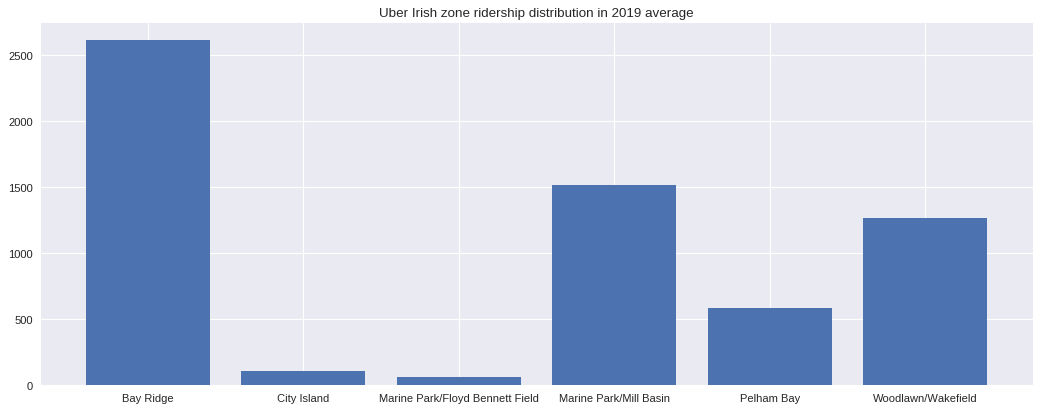

In [19]:
#details
#gaudian 10 irish bars
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
plt.bar(iri_loc.zone,iri_loc['N_trips']/334 )

plt.title('Uber Irish zone ridership distribution in 2019 average')

In [60]:
iri_patrick_2019['N_trips']

9      35
37      5
118     2
119    24
138    10
195    22
Name: N_trips, dtype: int64

Text(0.5,1,"Uber Irish zone ridership distribution on St Patrick's day")

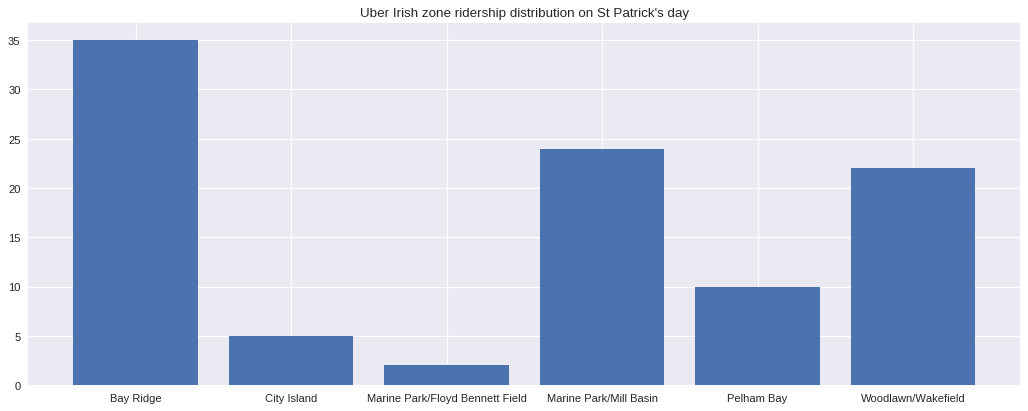

In [61]:
iri_patrick_2019 = patrick_2019[patrick_2019['LocationID'].isin([14,46,154,155,183,259])]
figure(figsize=(16, 6), dpi=80)
plt.bar(iri_patrick_2019.zone,iri_patrick_2019['N_trips'],visible)

plt.title("Uber Irish zone ridership distribution on St Patrick's day")

In [37]:
fhv_2019  = pd.read_csv('fhvhv_2019_03.csv')
fhv_2019['date'] = fhv_2019['pickup_datetime'].apply(lambda x: x.split(' ')[0])

In [38]:
fhv_patrick_2019 = fhv_2019[(fhv_2019['date']=='2019-03-17')&(fhv_2019['PULocationID'].isin([14,46,154,155,183,259]))]
fhv_patrick_2019 = fhv_patrick_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
fhv_patrick_2019.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
fhv_patrick_2019 = taxi_zone.merge(fhv_patrick_2019, left_on = 'LocationID', right_on = 'PULocationID', how = 'right')

Text(0.5,1,"For hire vehicles Irish zone ridership distribution on St Patrick's day")

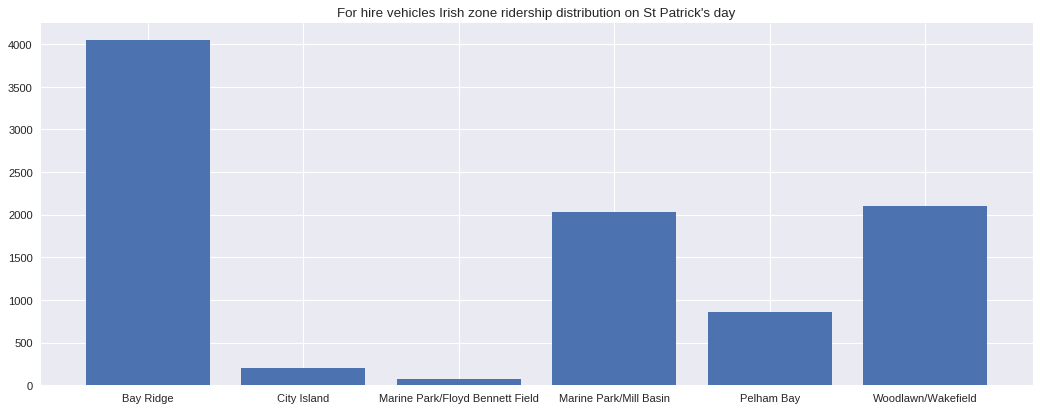

In [48]:
figure(figsize=(16, 6), dpi=80)
plt.bar(fhv_patrick_2019.zone,fhv_patrick_2019['N_trips'])

plt.title("For hire vehicles Irish zone ridership distribution on St Patrick's day")

Text(0.5,1,'Daily average of Uber ridership, 2019')

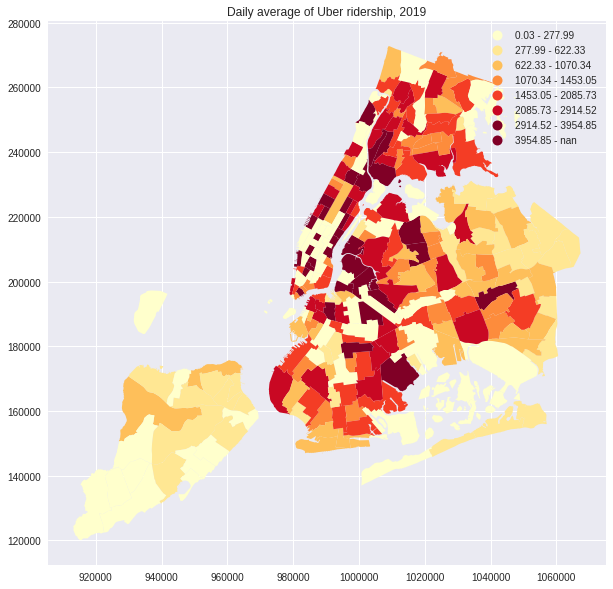

In [32]:
uber_zone['daily']=uber_zone['N_trips']/334
fig, ax = plt.subplots(1, figsize=(10,10))
uber_zone.plot(ax=ax, column='daily', k=8, scheme='Quantiles', legend=True,cmap="YlOrRd")
plt.title('Daily average of Uber ridership, 2019', fontsize = 12)


Text(0.5,1,"Uber ridership on St Patrick's day, 2019")

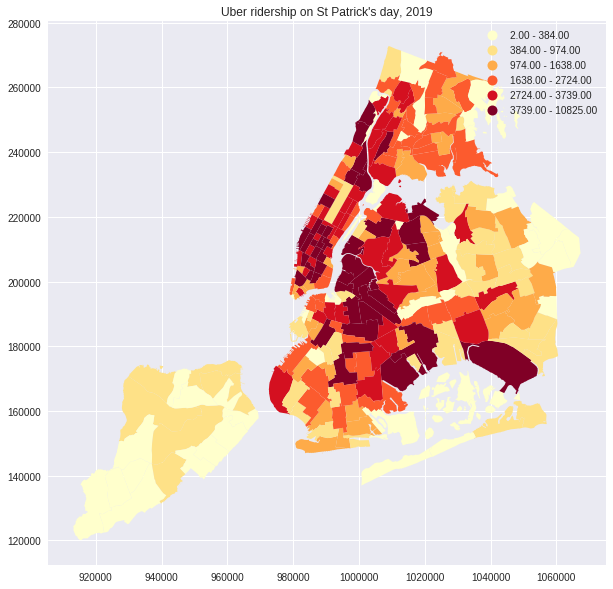

In [31]:
patrick_2019 = uber_2019[(uber_2019['date']=='2019-03-17')]
patrick_2019 = patrick_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
patrick_2019.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
patrick_2019

taxi_zone = gpd.read_file('taxi_zones.shp')
patrick_2019 = taxi_zone.merge(patrick_2019, left_on = 'LocationID', right_on = 'PULocationID', how = 'right')
patrick_2019.head()

fig, ax = plt.subplots(1, figsize=(10,10))
patrick_2019.plot(ax=ax, column='N_trips', k=6, scheme='Quantiles', legend=True,cmap="YlOrRd")
plt.title("Uber ridership on St Patrick's day, 2019", fontsize = 12)

Text(0.5,1,'daily average of uber ridership at irish zones, 2019')

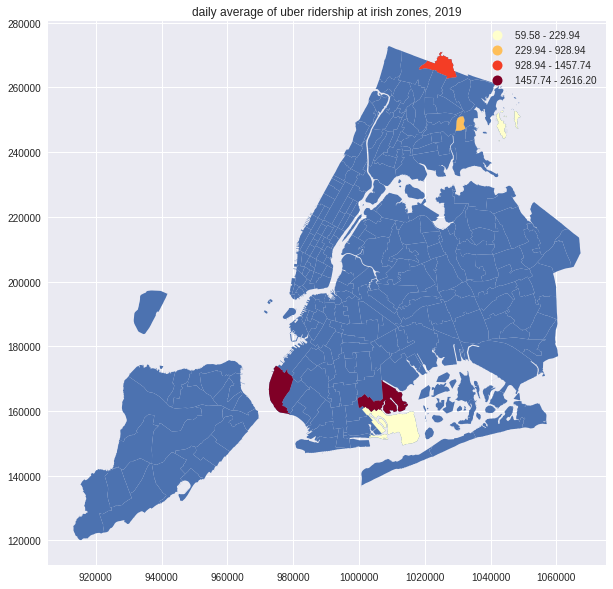

In [29]:
iri_loc['daily'] = iri_loc['N_trips']/334
fig, ax = plt.subplots(1, figsize=(10,10))
uber_zone.plot(ax=ax, k=8, scheme='Quantiles', legend=True)
iri_loc.plot(ax=ax, column='daily', k=4, scheme='Quantiles', legend=True,cmap="YlOrRd")
plt.title('Daily average of Uber ridership at irish zones, 2019', fontsize = 12)

Text(0.5,1,'green taxi ridership at irishi zones on st patrick day, 2019')

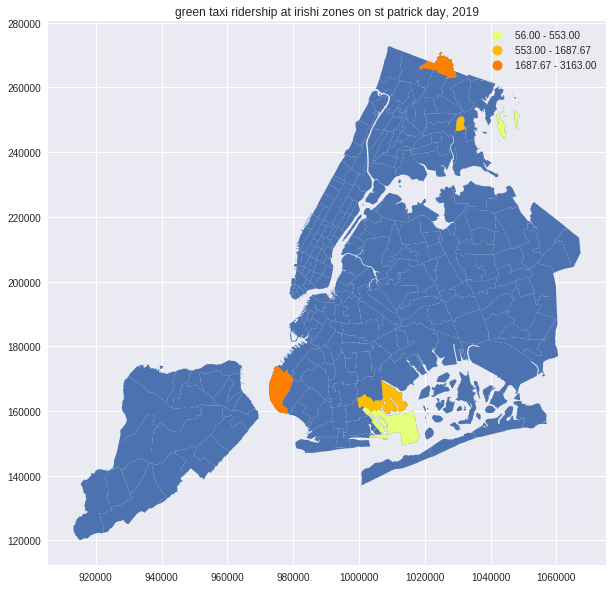

In [33]:
iri_patrick_2019 = patrick_2019[patrick_2019['LocationID'].isin([14,46,154,155,183,259])]
fig, ax = plt.subplots(1, figsize=(10,10))
patrick_2019.plot(ax=ax, k=8, scheme='Quantiles', legend=True)
iri_patrick_2019.plot(ax=ax, column='N_trips', k=3, scheme='Quantiles', legend=True,cmap='Wistia')
plt.title('green taxi ridership at irishi zones on st patrick day, 2019', fontsize = 12)

In [34]:
patrick_2019 = uber_2019[(uber_2019['date']=='2019-03-17')]
patrick_2019 = patrick_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
patrick_2019.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
patrick_2019

PULocationID  N_trips
0             2.0        2
1             3.0     1248
2             4.0     2562
3             5.0      127
4             6.0      239
5             7.0     7371
6             8.0       17
7             9.0      476
8            10.0     1494
9            11.0      579
10           12.0       75
11           13.0     1967
12           14.0     3163
13           15.0      353
14           16.0     1437
15           17.0     4990
16           18.0     3227
17           19.0      300
18           20.0     1756
19           21.0     1435
20           22.0     1792
21           23.0      567
22           24.0      856
23           25.0     2837
24           26.0     2724
25           27.0       31
26           28.0      974
27           29.0      978
28           30.0       24
29           31.0      235
..            ...      ...
228         235.0     3473
229         236.0     3211
230         237.0     3158
231         238.0     2923
232         239.0     3806
233         240.0      295
234         241.0     2780
235         242.0     1868
236         243.0     4054
237         244.0     4960
238         245.0      415
239         246.0     4102
240         247.0     3649
241         248.0     1695
242         249.0     5209
243         250.0     1445
244         251.0      366
245         252.0      629
246         253.0       12
247         254.0     2666
248         255.0     7822
249         256.0     5851
250         257.0      829
251         258.0     1723
252         259.0     1719
253         260.0     2805
254         261.0     1569
255         262.0     1826
256         263.0     3247
257         265.0       24

[258 rows x 2 columns]

In [35]:
taxi_zone = gpd.read_file('taxi_zones.shp')
patrick_2019 = taxi_zone.merge(patrick_2019, left_on = 'LocationID', right_on = 'PULocationID', how = 'right')
patrick_2019.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0       2.0    0.433470    0.004866              Jamaica Bay         2.0   
1       3.0    0.084341    0.000314  Allerton/Pelham Gardens         3.0   
2       4.0    0.043567    0.000112            Alphabet City         4.0   
3       5.0    0.092146    0.000498            Arden Heights         5.0   
4       6.0    0.150491    0.000606  Arrochar/Fort Wadsworth         6.0   

         borough                                           geometry  \
0         Queens  (POLYGON ((1033269.243591294 172126.0078125, 1...   
1          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...   
2      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...   
3  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...   
4  Staten Island  POLYGON ((966568.7466657609 158679.854687795, ...   

   PULocationID  N_trips  
0           2.0        2  
1           3.0     1248  
2           4.0     2562  
3           5.0      127  
4           6.0      239

 ## Green taxi

In [39]:
green_2019  = pd.read_csv('green_2019_03.csv')
green_2019['date'] = green_2019['lpep_pickup_datetime'].apply(lambda x: x.split(' ')[0])

In [40]:
patrick_2019 = green_2019[(green_2019['date']=='2019-03-17')]
patrick_2019 = patrick_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
patrick_2019.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
patrick_2019
#green taxi ridership on st patrick

PULocationID  N_trips
0               1        1
1               3       11
2               4        1
3               5        1
4               7      851
5               9        3
6              10       21
7              11       12
8              13        2
9              14       35
10             15        3
11             16        4
12             17      165
13             18       38
14             19        2
15             20       11
16             21       28
17             22       14
18             24       57
19             25      345
20             26       31
21             28       25
22             29       21
23             31       13
24             32       28
25             33      264
26             34        2
27             35       74
28             36       87
29             37       69
..            ...      ...
170           225      104
171           226      156
172           227       12
173           228       30
174           230        1
175           232        1
176           233        2
177           235       44
178           236       20
179           239        2
180           240        2
181           241       16
182           242       32
183           243       93
184           244      317
185           246        2
186           247       84
187           248       31
188           250       22
189           252        7
190           254       44
191           255      402
192           256      188
193           257       14
194           258       13
195           259       22
196           260      557
197           263       11
198           264       19
199           265        6

[200 rows x 2 columns]

In [41]:
taxi_zone = gpd.read_file('taxi_zones.shp')
patrick_2019 = taxi_zone.merge(patrick_2019, left_on = 'LocationID', right_on = 'PULocationID', how = 'right')
patrick_2019.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0       1.0    0.116357    0.000782           Newark Airport         1.0   
1       3.0    0.084341    0.000314  Allerton/Pelham Gardens         3.0   
2       4.0    0.043567    0.000112            Alphabet City         4.0   
3       5.0    0.092146    0.000498            Arden Heights         5.0   
4       7.0    0.107417    0.000390                  Astoria         7.0   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.9183527103 192536.0856972019,...   
1          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...   
2      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...   
3  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...   
4         Queens  POLYGON ((1010804.217962816 218919.6406951398,...   

   PULocationID  N_trips  
0             1        1  
1             3       11  
2             4        1  
3             5        1  
4             7      851

Text(0.5,1,"Taxi ridership on St Patrick's day, 2019")

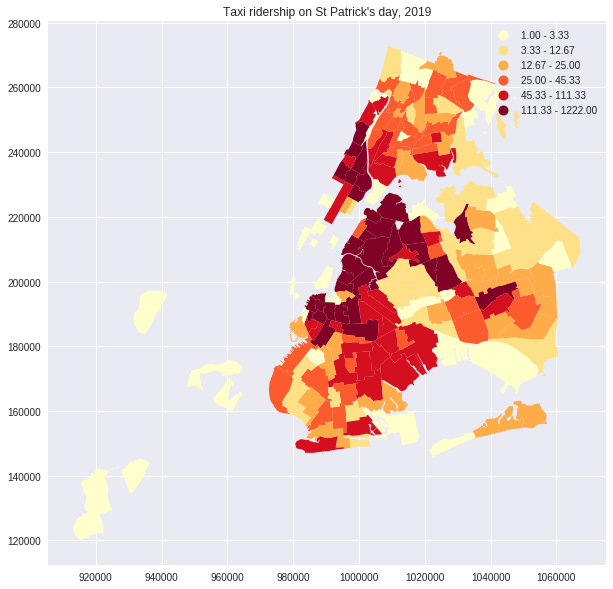

In [45]:
fig, ax = plt.subplots(1, figsize=(10,10))
patrick_2019.plot(ax=ax, column='N_trips', k=6, scheme='Quantiles', legend=True, cmap="YlOrRd")
plt.title("Taxi ridership on St Patrick's day, 2019", fontsize = 12)

In [43]:
iri_patrick_2019 = patrick_2019[patrick_2019['LocationID'].isin([14,46,154,155,183,259])]

Text(0.5,1,'green taxi ridership at irishi zones on st patrick day, 2019')

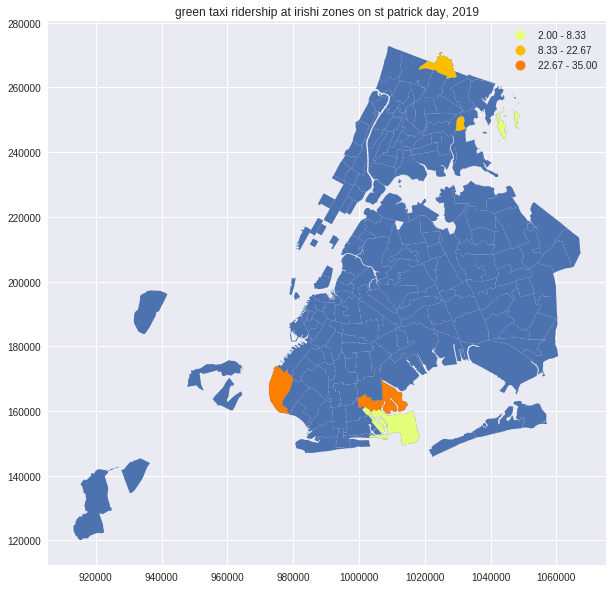

In [44]:
fig, ax = plt.subplots(1, figsize=(10,10))
patrick_2019.plot(ax=ax, k=8, scheme='Quantiles', legend=True)
iri_patrick_2019.plot(ax=ax, column='N_trips', k=3, scheme='Quantiles', legend=True,cmap='Wistia')
plt.title('green taxi ridership at irishi zones on st patrick day, 2019', fontsize = 12)

###  Yellow 2019 analysis-archive

In [50]:
taxi_2019 = pd.read_csv('vitto/taxi_2019.csv')

In [52]:
g = taxi_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
g.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
g.head()
taxi_zone = gpd.read_file('taxi_zones.shp')
zone = taxi_zone.merge(g, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
zone.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.9183527103 192536.0856972019,...   
1         Queens  (POLYGON ((1033269.243591294 172126.0078125, 1...   
2          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...   
3      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...   
4  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...   

   PULocationID   N_trips  
0           1.0    8644.0  
1           2.0     106.0  
2           3.0    2106.0  
3           4.0  142807.0  
4           5.0     345.0

In [58]:
zone.N_trips=zone.N_trips/len(zone)

Text(0.5,1,'Unnormalized pick-up location map of Yellow Taxi, 2019')

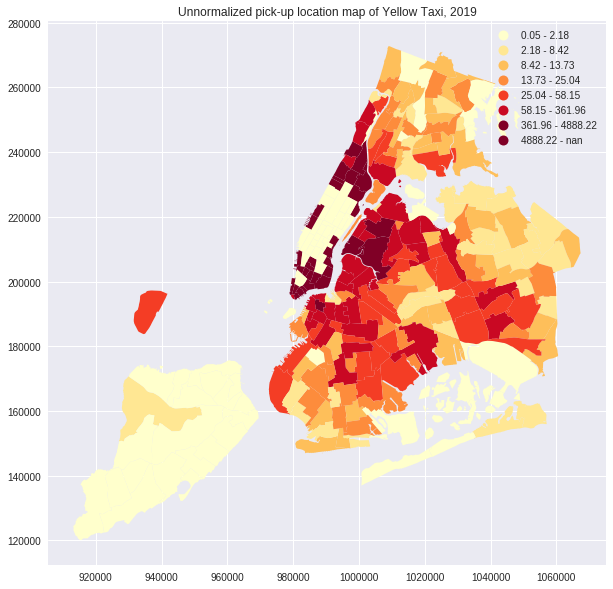

In [59]:
# check ridership distribution for the whole year
fig, ax = plt.subplots(1, figsize=(10,10))
zone.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True,cmap="YlOrRd")
#               legend_kwds={'loc': 'upper left'})
plt.title('Unnormalized pick-up location map of Yellow Taxi, 2019', fontsize = 12)

In [ ]:
def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'
def season_tag(x):
    if x in (1,2,12):
        return 'Winter'
    elif x in range(3,6):
        return 'Spring'
    elif x in range(6,9):
        return 'Summer'
    else:
        return 'Autumn'
    
Uber_aggby_count_part2['time_desc'] = Uber_aggby_count_part2['PU_Time'].apply(time_slots)
Uber_aggby_count_part2['season'] = Uber_aggby_count_part2['PU_Month'].apply(season_tag)

KeyboardInterrupt: 

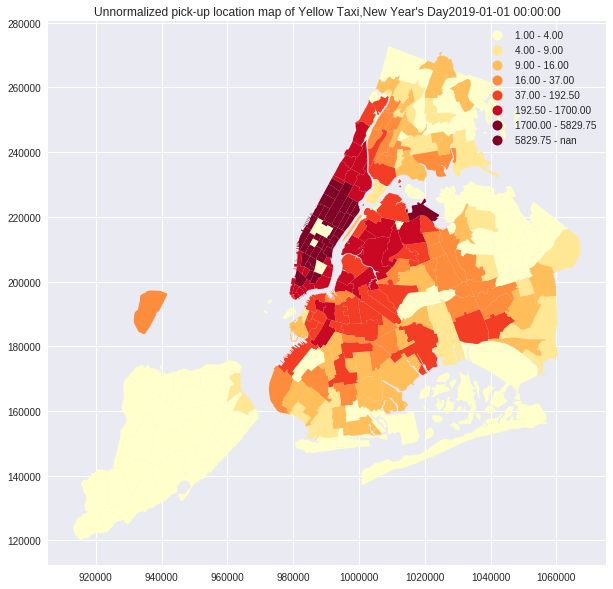

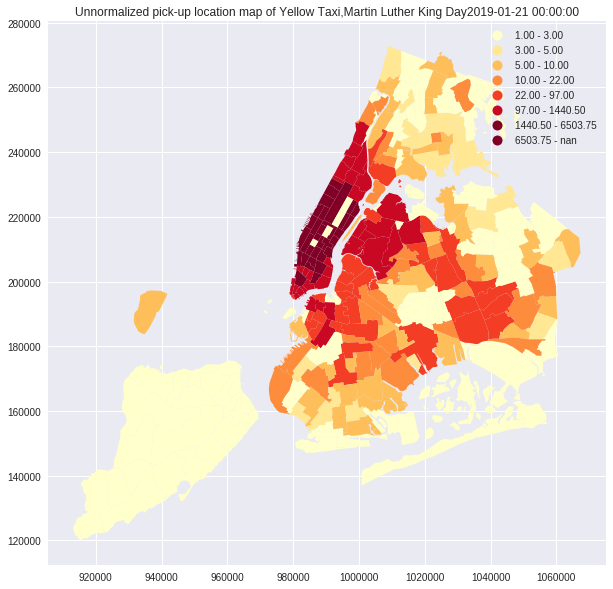

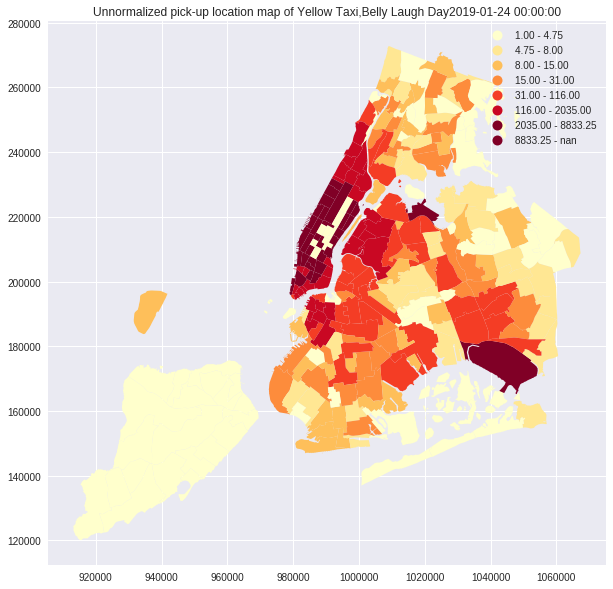

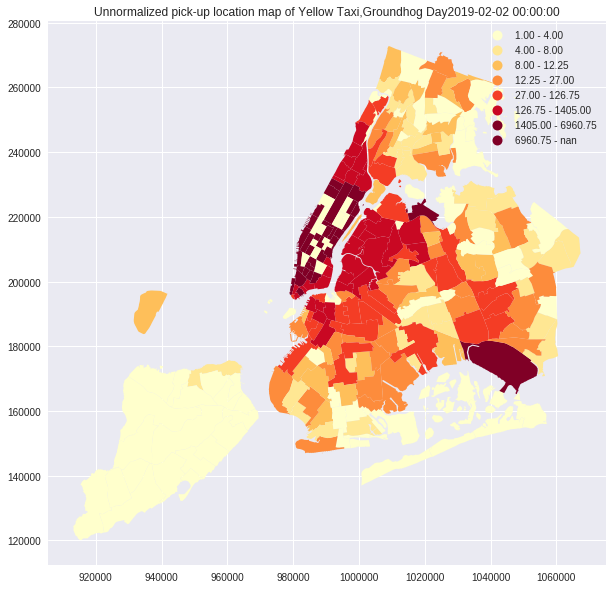

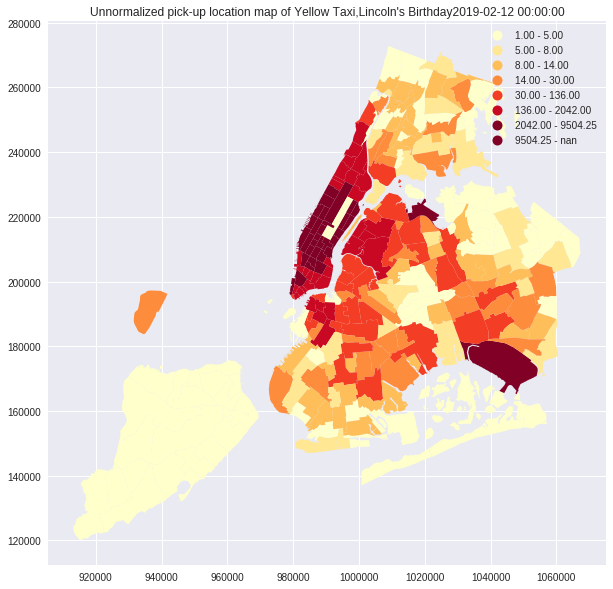

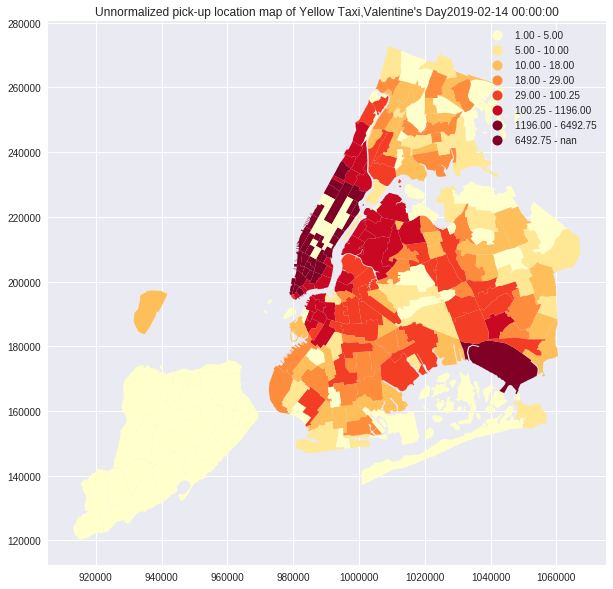

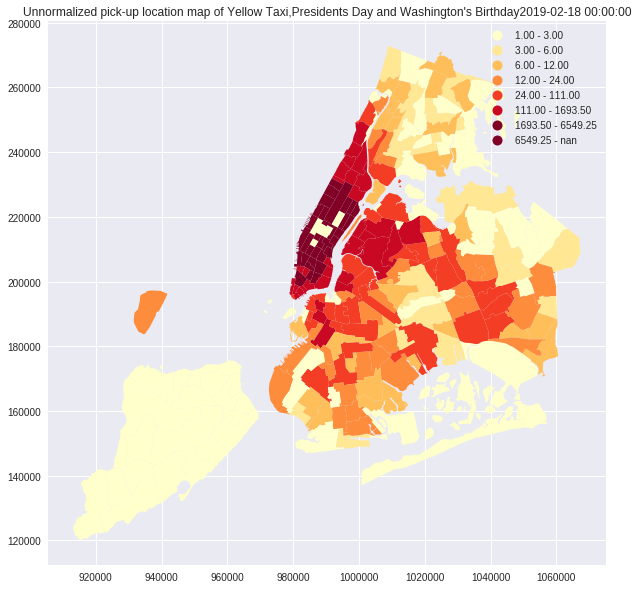

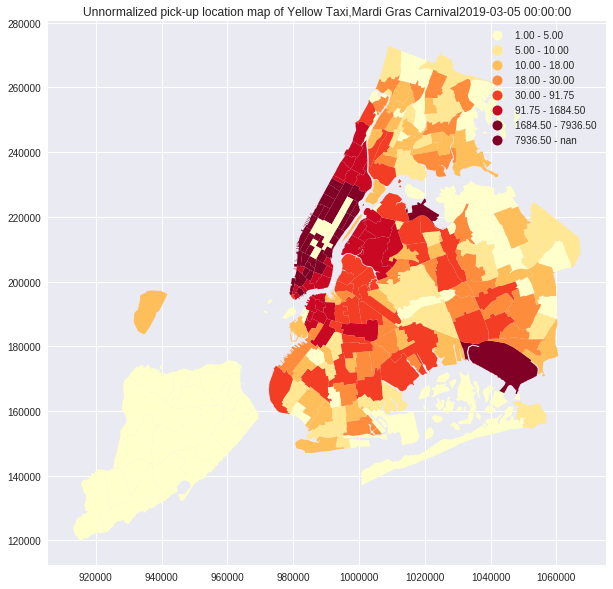

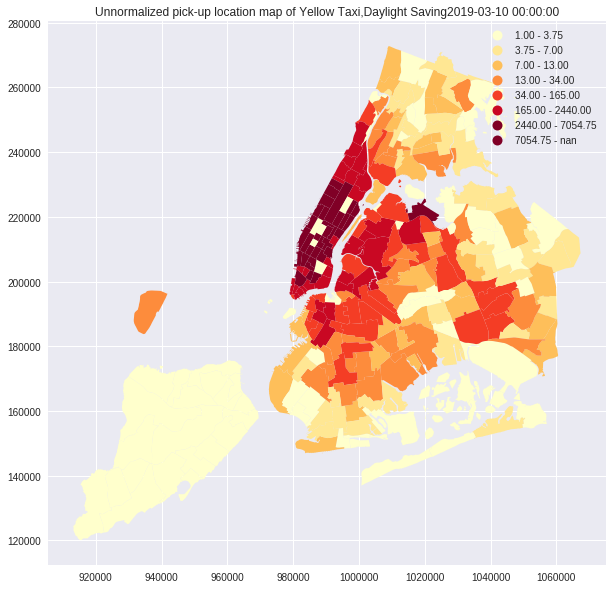

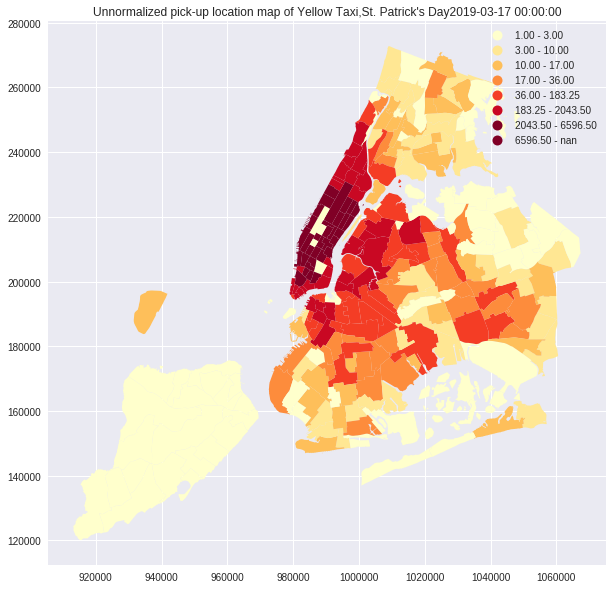

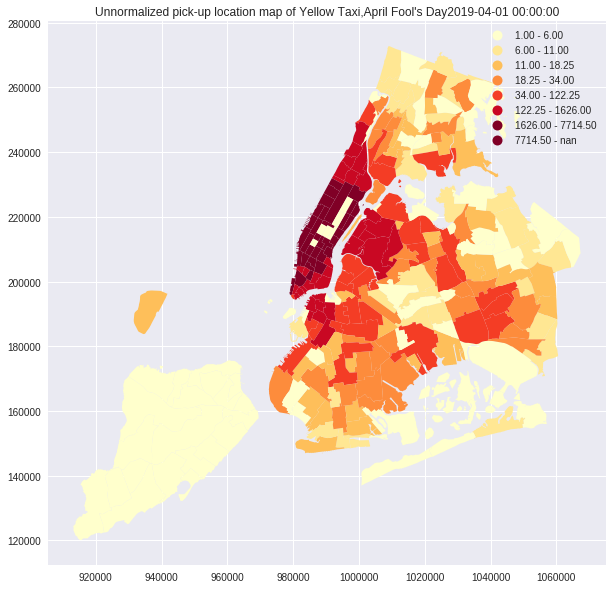

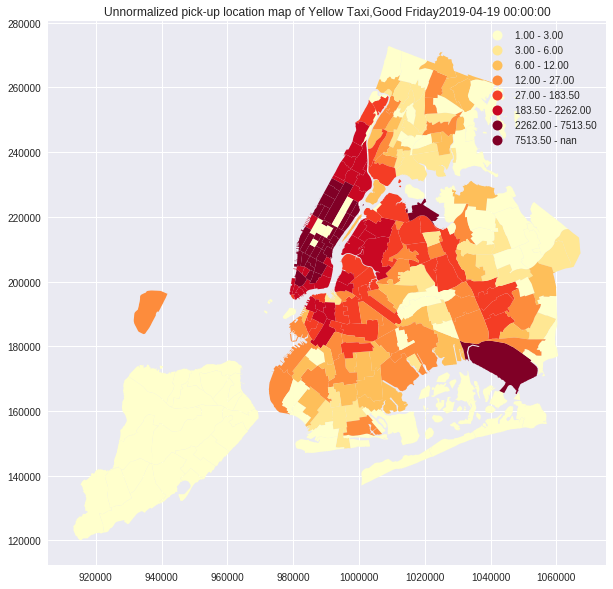

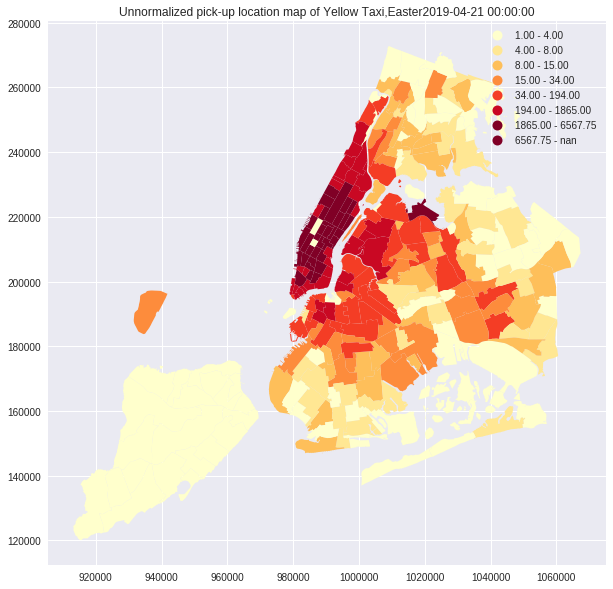

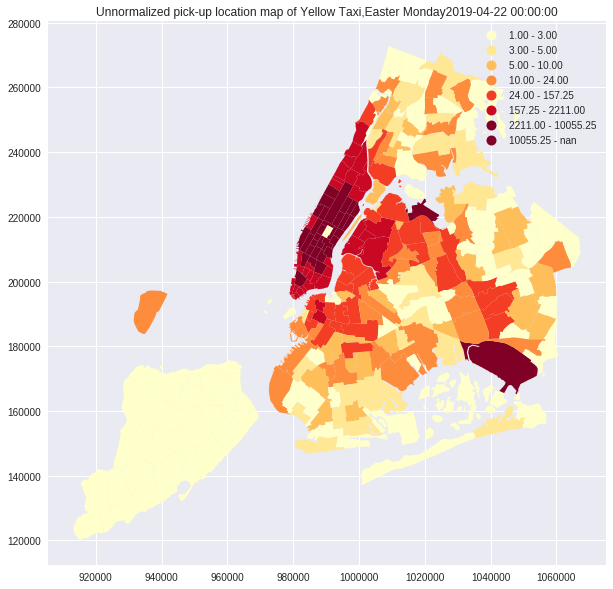

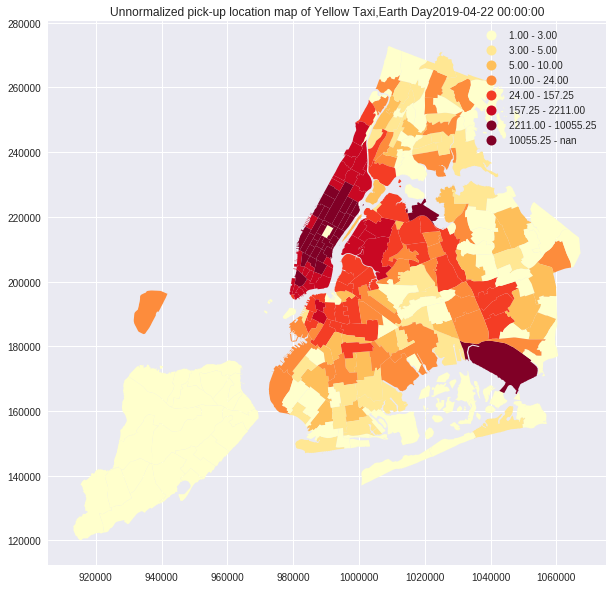

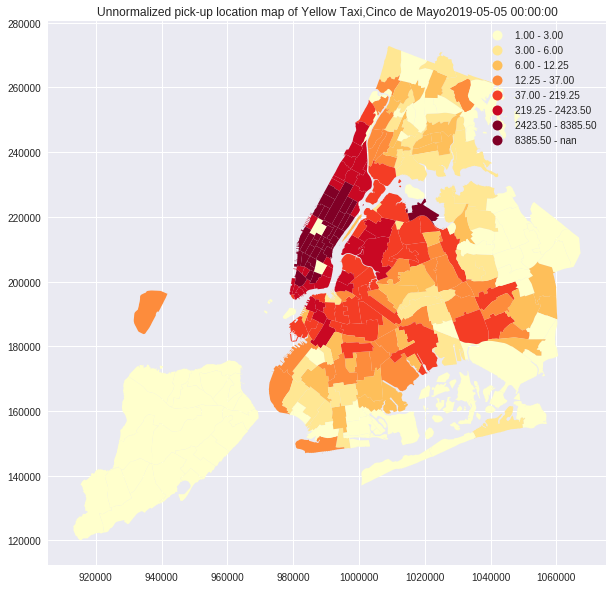

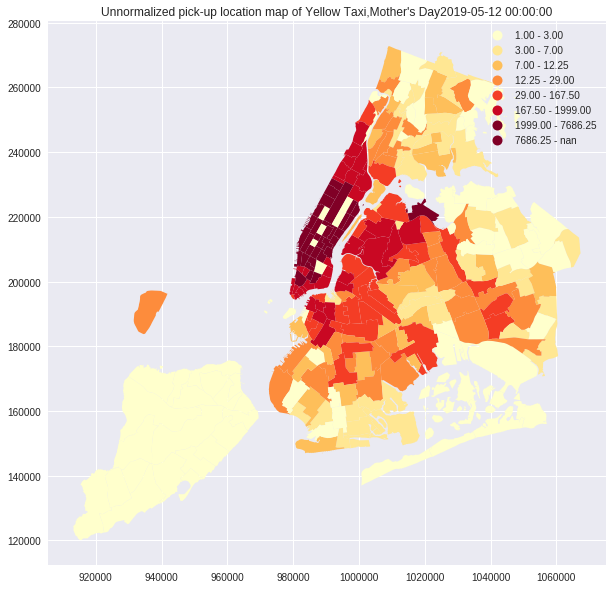

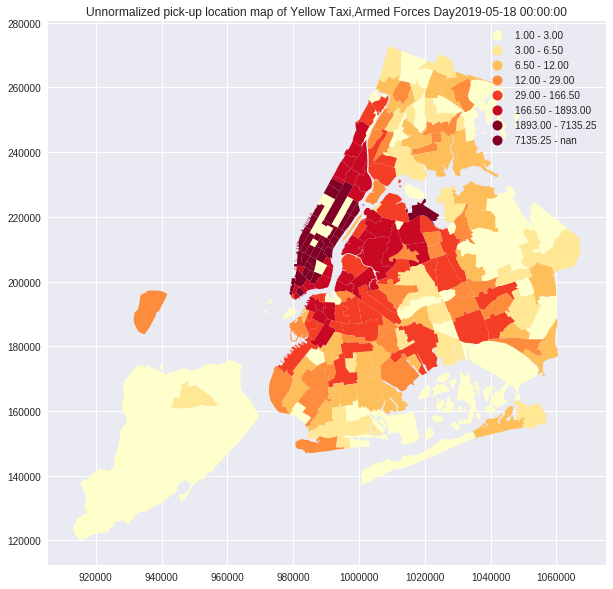

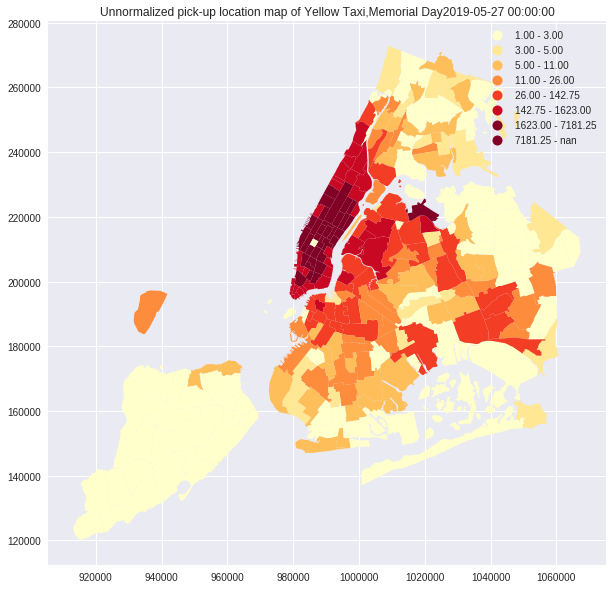

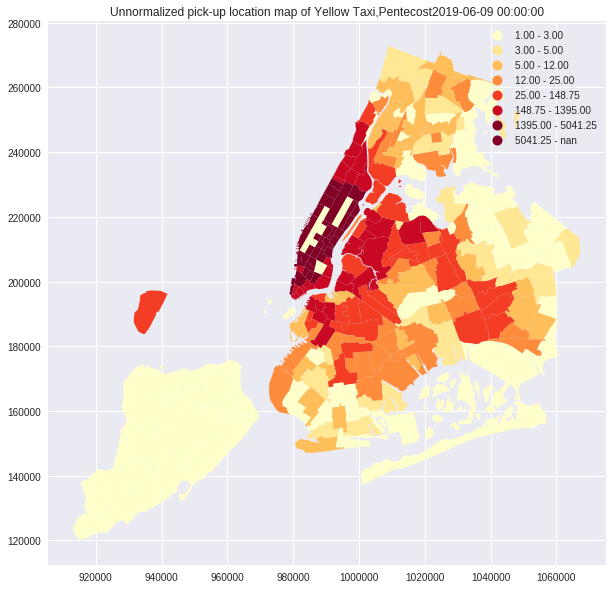

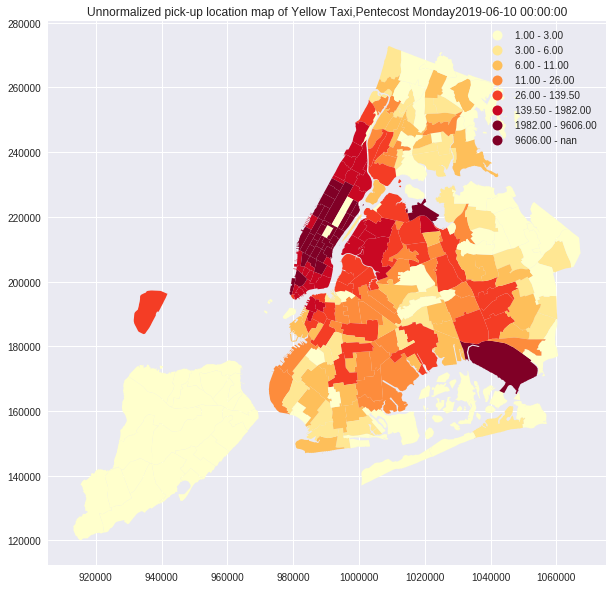

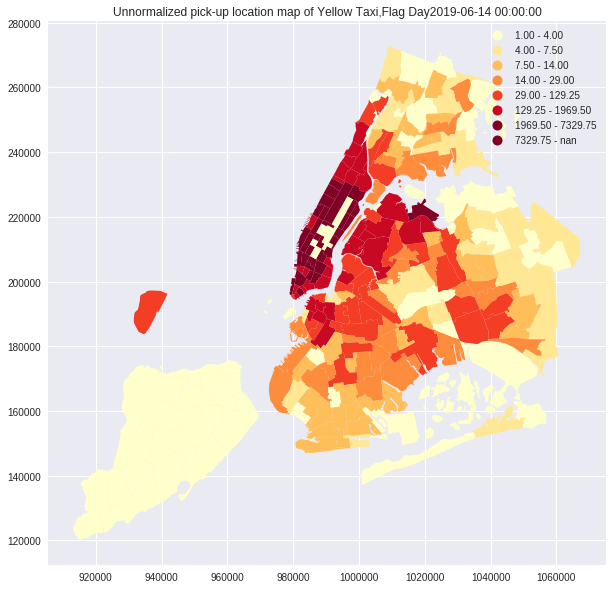

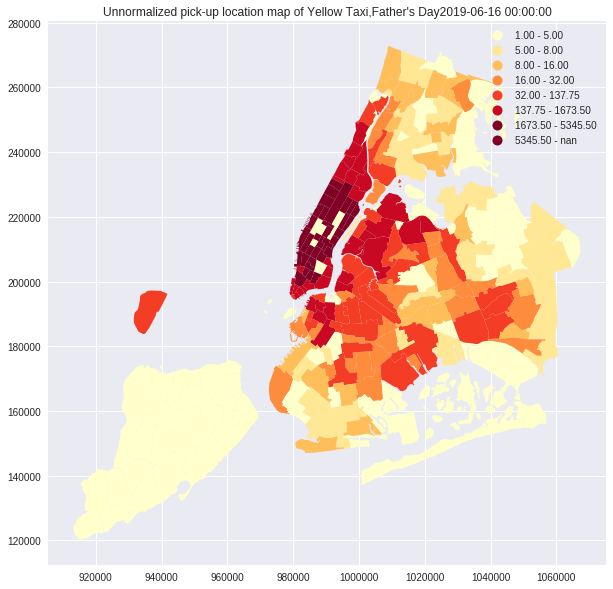

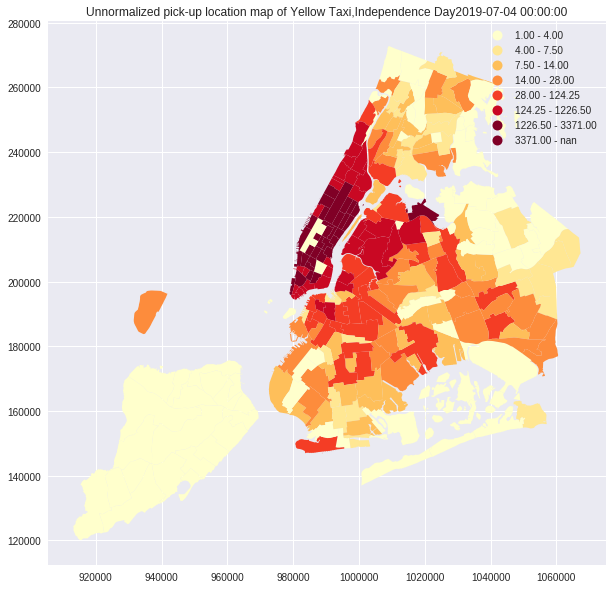

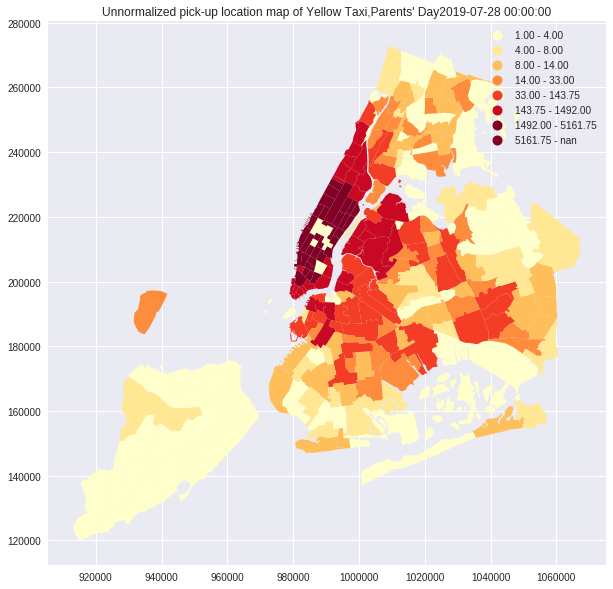

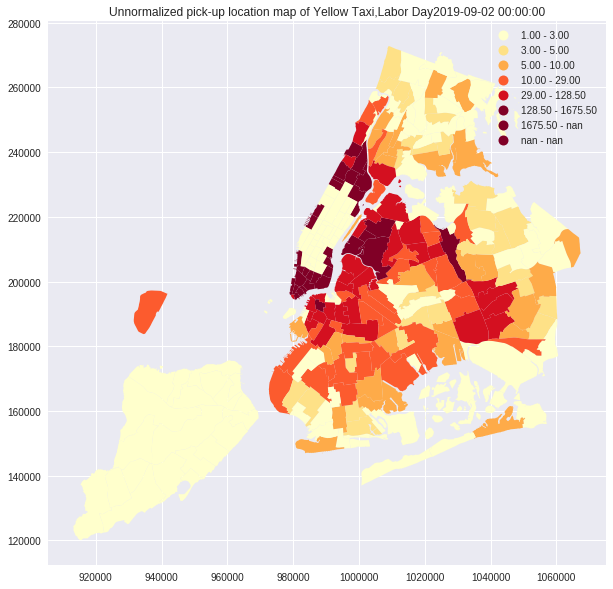

In [57]:
# changed the data souce to https://www.calendar-365.com/holidays/
holidays = pd.read_csv('Holidays-2019.csv')
holidays.Date = pd.to_datetime(holidays.Date)
# for i in range(len(holidays.Date)):


In [ ]:
i=0
    date = holidays.Date.iloc[i]
    name = holidays.Holiday.iloc[i]
    #date_range = [(date-datetime.timedelta(days=5)): (date +datetime.timedelta(days=5))]
    yellow_hol = taxi_2019[pd.to_datetime(taxi_2019.date)==date]
    yellow_hol_g = yellow_hol.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
    yellow_hol_g.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
    taxi_zone = gpd.read_file('taxi_zones.shp')
    hol_zone = taxi_zone.merge(yellow_hol_g, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
    fig, ax = plt.subplots(1, figsize=(10,10))
    hol_zone.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, cmap="YlOrRd")
#                   legend_kwds={'loc': 'upper left'})
    plt.title('Unnormalized pick-up location map of Yellow Taxi,'+ name+str(date), fontsize = 12)

In [ ]:
tripsbyday = yellow_taxi_2019.groupby(['date']).sum()
tripsbyday.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
tripsbyday.index = pd.to_datetime(tripsbyday.index)

In [ ]:
holiday_trips = tripsbyday['N_trips'].copy(deep=True)
nons= holiday_trips[~holiday_trips.index.isin(holidays['Date'])]#non-holidays set as 0
nons = [0]*len(nons)
holiday_trips[~holiday_trips.index.isin(holidays['Date'])] = nons

In [ ]:
plt.plot(tripsbyday.index,tripsbyday['N_trips'],color='blue',label="everyday")
plt.scatter(tripsbyday.index,holiday_trips,color='red',label="holidays")
plt.title('Ridership time series')
plt.xlabel("date")#横坐标名字
plt.ylabel("number of trips")#纵坐标名字
plt.legend(loc = "best")
plt.show()

In [ ]:
# Uber 2019
uber_2019 = pd.read_csv('uber_2019.csv')

In [ ]:
uber_2019_g = uber_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
uber_2019_g.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
uber_2019_g.head()

In [ ]:
uber_zone = taxi_zone.merge(uber_2019_g, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
plt.bar(np.unique(uber_zone.borough),uber_zone.groupby(['borough']).sum()['N_trips'])

In [ ]:
# check ridership distribution for the whole year, except for January
fig, ax = plt.subplots(1, figsize=(10,10))
uber_zone.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
plt.title('Unnormalized pick-up location map of Uber, 2019', fontsize = 12)

In [ ]:
holidays.Date = pd.to_datetime(holidays.Date)
uber_2019.date = pd.to_datetime(uber_2019.date)
for i in range(3,len(holidays.Date)):
    date = holidays.Date.iloc[i]
    name = holidays.Holiday.iloc[i]
    #date_range = [(date-datetime.timedelta(days=5)): (date +datetime.timedelta(days=5))]
    uber_hol = uber_2019[uber_2019.date==date]
    uber_hol_g = uber_hol.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
    uber_hol_g.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
    taxi_zone = gpd.read_file('taxi_zones.shp')
    hol_zone = taxi_zone.merge(uber_hol_g, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
    fig, ax = plt.subplots(1, figsize=(10,10))
    hol_zone.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, 
                  legend_kwds={'loc': 'upper left'})
    plt.title('Unnormalized pick-up location map of Uber on '+ name+str(date), fontsize = 12)

In [ ]:
# time series analysis
tripsbyday = uber_2019.groupby(['date']).sum()
tripsbyday.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
tripsbyday.index = pd.to_datetime(tripsbyday.index)

holiday_trips = tripsbyday['N_trips'].copy(deep=True)
nons= holiday_trips[~holiday_trips.index.isin(holidays['Date'])]#non-holidays set as 0
nons = [0]*len(nons)
holiday_trips[~holiday_trips.index.isin(holidays['Date'])] = nons

In [ ]:
plt.plot(tripsbyday.index,tripsbyday['N_trips'],color='blue',label="everyday")
plt.scatter(tripsbyday.index,holiday_trips,color='red',label="holidays")
plt.title('Uber ridership time series')
plt.xlabel("date")
plt.ylabel("number of trips")
plt.legend(loc = "best")
plt.show()

In [ ]:
# Lyft 2019
lyft_2019 = pd.read_csv('lyft_2019.csv')

In [ ]:
lyft_2019_g = lyft_2019.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
lyft_2019_g.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
lyft_2019_g.head()

In [ ]:
lyft_zone = taxi_zone.merge(lyft_2019_g, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
plt.bar(np.unique(lyft_zone.borough),lyft_zone.groupby(['borough']).sum()['N_trips'])
#much less than uber

In [ ]:
# check ridership distribution for the whole year
fig, ax = plt.subplots(1, figsize=(10,10))
lyft_zone.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})
plt.title('Unnormalized pick-up location map of Lyft, 2019', fontsize = 12)

In [ ]:
lyft_2019['date'] = pd.to_datetime(lyft_2019['pickup_datetime']).dt.date

In [ ]:
holidays.Date = pd.to_datetime(holidays.Date)
lyft_2019.date = pd.to_datetime(lyft_2019.date)
for i in range(len(holidays.Date)):
    date = holidays.Date.iloc[i]
    name = holidays.Holiday.iloc[i]
    #date_range = [(date-datetime.timedelta(days=5)): (date +datetime.timedelta(days=5))]
    lyft_hol = lyft_2019[lyft_2019.date==date]
    lyft_hol_g = lyft_hol.groupby(['PULocationID']).agg({'DOLocationID':'count'}).reset_index()
    lyft_hol_g.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
    taxi_zone = gpd.read_file('taxi_zones.shp')
    hol_zone = taxi_zone.merge(lyft_hol_g, left_on = 'LocationID', right_on = 'PULocationID', how = 'left')
    fig, ax = plt.subplots(1, figsize=(10,10))
    hol_zone.plot(ax=ax, column='N_trips', k=8, scheme='Quantiles', legend=True, 
                  legend_kwds={'loc': 'upper left'})
    plt.title('Unnormalized pick-up location map of Lyft on '+ name+str(date), fontsize = 12)

In [ ]:
# time series analysis
tripsbyday = lyft_2019.groupby(['date']).sum()
tripsbyday.rename(columns={'DOLocationID':'N_trips'}, inplace=True)
tripsbyday.index = pd.to_datetime(tripsbyday.index)

holiday_trips = tripsbyday['N_trips'].copy(deep=True)
nons= holiday_trips[~holiday_trips.index.isin(holidays['Date'])]#non-holidays set as 0
nons = [0]*len(nons)
holiday_trips[~holiday_trips.index.isin(holidays['Date'])] = nons

In [ ]:
plt.plot(tripsbyday.index,tripsbyday['N_trips'],color='blue',label="everyday")
plt.scatter(tripsbyday.index,holiday_trips,color='red',label="holidays")
plt.title('Lyft ridership time series')
plt.xlabel("date")
plt.ylabel("number of trips")
plt.legend(loc = "best")
plt.show()